In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

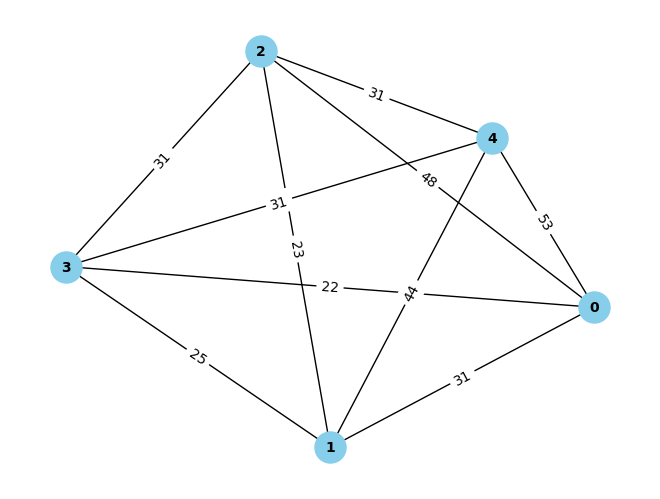

In [2]:
# Load adjacency matrix from CSV
adjacency_matrix_file = r'districting_2020\RI\counties\graph\RI_distances.csv'
adjacency_matrix_df = pd.read_csv(adjacency_matrix_file, index_col=0)

# Convert DataFrame to numpy array
adjacency_matrix = adjacency_matrix_df.to_numpy()

# Create a graph object
G = nx.from_numpy_array(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # Positions nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [3]:
RI_population = "districting_2020/RI/counties/graph/RI.population"

In [4]:
# Open the file and read its contents
with open(RI_population, 'r') as file:
    # Read the total population from the first line
    total_population_line = next(file).strip()  # Removes newline character at the end
    total_population = int(total_population_line.split('=')[1].strip())
    
    # Initialize a dictionary to store the rest of the data
    data = {}
    
    # Iterate over the remaining lines
    for line in file:
        # Each line is expected to have two values, separated by a space
        key, value = line.strip().split()  # Split by whitespace
        data[int(key)] = int(value)  # Convert both to integers and store in the dictionary

# Print the results to verify
total_population, data

(1097379, {0: 660741, 1: 50793, 2: 85643, 3: 170363, 4: 129839})

In [5]:
total_population/5

219475.8

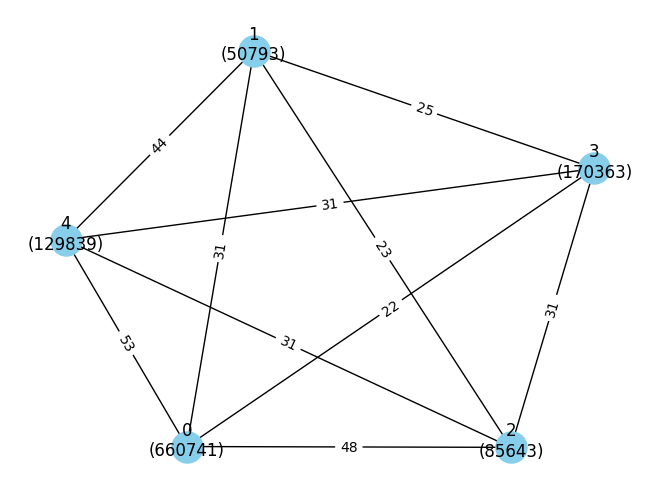

In [6]:
population_data: {0: 660741, 1: 50793, 2: 85643, 3: 170363, 4: 129839}
adjacency_matrix = adjacency_matrix_df.to_numpy()
G = nx.from_numpy_array(adjacency_matrix)
pos = nx.spring_layout(G)

# Your dictionary with the population data (replace this with your actual data)
population_data = {0: 660741, 1: 50793, 2: 85643, 3: 170363, 4: 129839}

# Update the labels with the population data
for node in G.nodes():
    G.nodes[node]['population'] = population_data[node]

# Draw the graph
nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
label_pos = {k: [v[0], v[1] + 0.03] for k, v in pos.items()}  # This offsets the labels slightly above the nodes
labels = {node: f"{node}\n({G.nodes[node]['population']})" for node in G.nodes()}
nx.draw_networkx_labels(G, label_pos, labels=labels)

# Assuming you have edge weights you want to display
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [7]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

In [8]:
# Model
m = gp.Model("district")
m

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-11


<gurobi.Model Continuous instance district: 0 constrs, 0 vars, Parameter changes: Username=(user-defined)>

In [9]:
state = 'CA'
population = "districting_2020\\{}\\counties\\graph\\{}.population".format(state, state)
dimacs = "districting_2020\\{}\\counties\\graph\\{}.dimacs".format(state, state)

with open('Numberofdistricts.txt', 'r') as file:
    for line in file:
        parts = line.strip().split('\t')
        if parts[0] == state:
            num_districts = int(parts[1])


with open(population, "r") as file:
    # Skip the first line
    next(file)
    # Count the number of lines, each line represents a county
    num_counties = sum(1 for line in file)

num_districts


52

In [10]:
## Reading distances from file
filename = "districting_2020\\{}\\counties\\graph\\{}_distances.csv".format(state, state)
d = np.genfromtxt(filename, delimiter=',', skip_header=1)
d = d[:, 1:]

## Reading populations from file
with open(population, 'r') as file:
    # Read the total population from the first line
    total_population_line = next(file).strip()  # Removes newline character at the end
    total_population = int(total_population_line.split('=')[1].strip())
    
    # Initialize a dictionary to store the rest of the data
    p = {}
    
    # Iterate over the remaining lines
    for line in file:
        # Each line is expected to have two values, separated by a space
        key, value = line.strip().split()  # Split by whitespace
        p[int(key)] = int(value)  # Convert both to integers and store in the dictionary

## Reading neighbors from file
neighbors = set()
with open(dimacs, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line.startswith('e'):
            _, node1, node2 = line.split()
            node1 = int(node1)
            node2 = int(node2)
            if (node1, node2) not in neighbors and (node2, node1) not in neighbors:
                neighbors.add((node1, node2))

list(neighbors)

[(15, 21),
 (8, 46),
 (7, 26),
 (2, 48),
 (29, 32),
 (8, 9),
 (40, 41),
 (20, 38),
 (49, 53),
 (0, 14),
 (5, 28),
 (31, 56),
 (10, 27),
 (12, 18),
 (5, 21),
 (21, 39),
 (23, 36),
 (4, 32),
 (1, 8),
 (21, 57),
 (12, 54),
 (36, 48),
 (47, 48),
 (25, 27),
 (8, 50),
 (16, 42),
 (5, 23),
 (40, 54),
 (4, 34),
 (18, 51),
 (1, 10),
 (36, 41),
 (24, 30),
 (0, 30),
 (30, 43),
 (9, 42),
 (0, 39),
 (1, 46),
 (9, 51),
 (11, 48),
 (12, 13),
 (12, 22),
 (3, 19),
 (12, 31),
 (49, 50),
 (55, 56),
 (36, 52),
 (50, 51),
 (28, 48),
 (25, 40),
 (2, 47),
 (35, 53),
 (9, 16),
 (12, 33),
 (14, 30),
 (4, 29),
 (19, 38),
 (22, 55),
 (5, 57),
 (31, 39),
 (23, 44),
 (2, 6),
 (13, 18),
 (1, 16),
 (37, 46),
 (3, 53),
 (8, 49),
 (32, 34),
 (11, 45),
 (33, 51),
 (21, 31),
 (23, 28),
 (26, 45),
 (27, 46),
 (2, 26),
 (9, 50),
 (11, 47),
 (6, 26),
 (43, 45),
 (52, 57),
 (29, 37),
 (4, 17),
 (26, 47),
 (7, 43),
 (4, 35),
 (8, 17),
 (14, 39),
 (19, 35),
 (13, 25),
 (24, 43),
 (33, 55),
 (7, 45),
 (10, 16),
 (0, 15),
 (11,

In [11]:
adjacency_matrix_file = r"districting_2020\\2020\\{}\\counties\\graph\\{}_distances.csv".format(state, state)

# Set decision variable x for each node i whether it is in district j
x = {}
for i in range(num_counties):
    for j in range(num_districts):
        x[i, j] = m.addVar(vtype=gp.GRB.BINARY, name="x_{}_{}".format(i, j))

## Set decision variable y for each edge in neighbors, between nodes i and k, for each district j
y = {}
for i, k in neighbors:
    for j in range(num_districts):
        y[i, k, j] = m.addVar(vtype=gp.GRB.BINARY, name="y_{}_{}_{}".format(i, k, j))

# for i in range(num_counties):
#     for k in range(num_counties):
#         for j in range(num_districts):
#             y[i, k, j] = m.addVar(vtype=gp.GRB.BINARY, name="y_{}_{}_{}".format(i, k, j))

# Set slack variable
slack = {}
for j in range(num_districts):
    slack[j] = m.addVar(obj=1, name="slack")




alpha = 0.1  # Weight of the balanced weight term
y


{(15, 21, 0): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 1): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 2): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 3): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 4): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 5): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 6): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 7): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 8): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 9): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 10): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 11): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 12): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 13): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 14): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 15): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 16): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 17): <gurobi.Var *Awaiting Model Update*>,
 (15, 21, 18): <gurobi.Var *Awaiting Model Update*>,
 (1

In [12]:
# Set objective function
m.setObjective(-gp.quicksum(y[i, k, j] * d[i, k] for i, k in neighbors for j in range(num_districts)) \
             + alpha * (gp.quicksum(slack[j] for j in range(num_districts))), gp.GRB.MINIMIZE)


In [13]:

# Each edge in neighbors is assigned to exactly one district
for i, k in neighbors:
    for j in range(num_districts):
        m.addConstr(x[i, j] + x[k, j] >= 2 * y[i, k, j] )
        m.addConstr(x[i, j] + x[k, j] <= 1 + y[i, k, j])

# Add population constraint with slack variable
for j in range(num_districts):
    m.addConstr(gp.quicksum(x[i, j] * p[i] for i in range(num_counties)) >= ((total_population / num_districts) - slack[j]))
    m.addConstr(gp.quicksum(x[i, j] * p[i] for i in range(num_counties)) <= ((total_population / num_districts) + slack[j]))

# Each county is assigned to exactly one district
for i in range(num_counties):
    m.addConstr(gp.quicksum(x[i, j] for j in range(num_districts)) == 1)

for j in range(num_districts):
    m.addConstr(gp.quicksum(x[i, j] for i in range(num_counties)) >= 1)


In [14]:
# Write LP formulation to a file
m.write("districts.lp")

# Read the LP formulation from the file
with open("districts.lp", "r") as f:
    lp_formulation = f.read()

# Print LP formulation
print("LP Formulation:")
print(lp_formulation)

# Solve
m.optimize()

LP Formulation:
\ Model district
\ LP format - for model browsing. Use MPS format to capture full model detail.
Minimize
  - 71 y_15_21_0 - 71 y_15_21_1 - 71 y_15_21_2 - 71 y_15_21_3 - 71 y_15_21_4
   - 71 y_15_21_5 - 71 y_15_21_6 - 71 y_15_21_7 - 71 y_15_21_8
   - 71 y_15_21_9 - 71 y_15_21_10 - 71 y_15_21_11 - 71 y_15_21_12
   - 71 y_15_21_13 - 71 y_15_21_14 - 71 y_15_21_15 - 71 y_15_21_16
   - 71 y_15_21_17 - 71 y_15_21_18 - 71 y_15_21_19 - 71 y_15_21_20
   - 71 y_15_21_21 - 71 y_15_21_22 - 71 y_15_21_23 - 71 y_15_21_24
   - 71 y_15_21_25 - 71 y_15_21_26 - 71 y_15_21_27 - 71 y_15_21_28
   - 71 y_15_21_29 - 71 y_15_21_30 - 71 y_15_21_31 - 71 y_15_21_32
   - 71 y_15_21_33 - 71 y_15_21_34 - 71 y_15_21_35 - 71 y_15_21_36
   - 71 y_15_21_37 - 71 y_15_21_38 - 71 y_15_21_39 - 71 y_15_21_40
   - 71 y_15_21_41 - 71 y_15_21_42 - 71 y_15_21_43 - 71 y_15_21_44
   - 71 y_15_21_45 - 71 y_15_21_46 - 71 y_15_21_47 - 71 y_15_21_48
   - 71 y_15_21_49 - 71 y_15_21_50 - 71 y_15_21_51 - 159 y_8_46_0
   -

In [ ]:
def printSolution():
    if m.status == GRB.OPTIMAL:
        print('\nObjective Value: %g' % m.ObjVal)
        for i in range(num_counties):
            for j in range(num_districts):
                print("x_{}_{} = {}".format(i, j, x[i, j].X))
        for j in range(num_districts):
            print("slack_{} = {}".format(j, slack[j].X))
    else:
        print('No solution')

printSolution()


Objective Value: 0


AttributeError: Unable to retrieve attribute 'X'

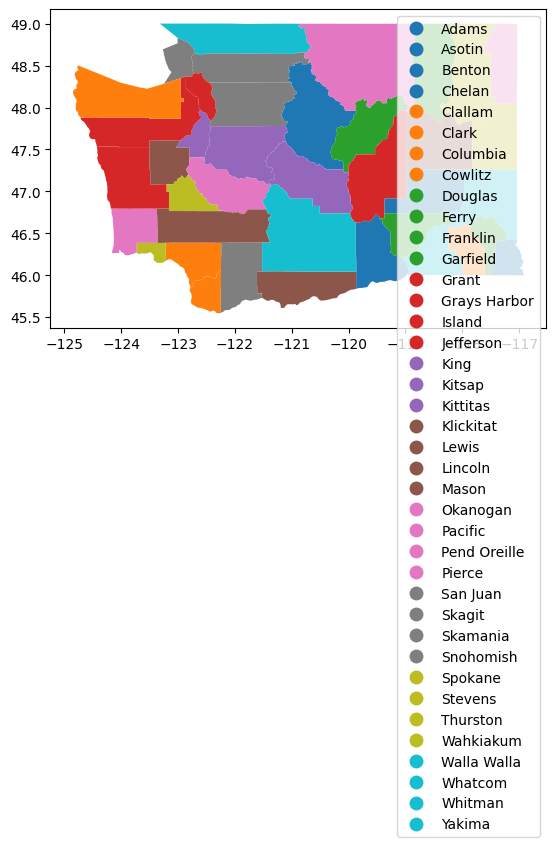

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

path_to_visualize = r"districting_2020\\{}\\counties\\maps\\{}_counties.shp".format(state, state)
# Load the shapefile
counties_gdf = gpd.read_file(path_to_visualize)


counties_gdf.plot(column='NAME20', legend = True)
plt.show()


In [ ]:
def get_district_counties():
    # Initialize a dictionary to hold counties for each district
    district_counties = {j: set() for j in range(num_districts)}

    # Iterate over x variables to find counties assigned to each district
    for i in range(num_counties):
        for j in range(num_districts):
            if x[i, j].X > 0.5:  # County is part of the district
                district_counties[j].add(i)
    
    return district_counties

# Assuming the model has been optimized
if m.status == GRB.OPTIMAL:
    district_counties = get_district_counties()
    for j, counties in district_counties.items():
        print(f"District {j} contains counties: {counties}")
else:
    print("No solution")


District 0 contains counties: {0, 35}
District 1 contains counties: {1}
District 2 contains counties: {8}
District 3 contains counties: {2, 3, 4, 5, 34, 7, 38, 14, 15, 16, 18, 20, 22, 25, 30, 31}
District 4 contains counties: {32}
District 5 contains counties: {17}
District 6 contains counties: {36, 37, 11, 12, 19, 21, 29}
District 7 contains counties: {33, 6, 9, 10, 13, 26, 27, 28}
District 8 contains counties: {23}
District 9 contains counties: {24}


In [ ]:
population = r"districting_2020\\{}\\counties\\graph\\{}.population".format(state, state)
# Open the file and read its contents
with open(population, 'r') as file:
    # Read the total population from the first line
    total_population_line = next(file).strip()  # Removes newline character at the end
    total_population = int(total_population_line.split('=')[1].strip())
    
    # Initialize a dictionary to store the rest of the data
    data = {}
    
    # Iterate over the remaining lines
    for line in file:
        # Each line is expected to have two values, separated by a space
        key, value = line.strip().split()  # Split by whitespace
        data[int(key)] = int(value)  # Convert both to integers and store in the dictionary

# Print the results to verify
total_population, data

(7705281,
 {0: 13401,
  1: 226847,
  2: 79074,
  3: 22285,
  4: 7178,
  5: 42938,
  6: 206873,
  7: 2286,
  8: 2269675,
  9: 23365,
  10: 22735,
  11: 17788,
  12: 75636,
  13: 110730,
  14: 62584,
  15: 99123,
  16: 20613,
  17: 503311,
  18: 10876,
  19: 275611,
  20: 47973,
  21: 65726,
  22: 129523,
  23: 921130,
  24: 294793,
  25: 96749,
  26: 12036,
  27: 4422,
  28: 82149,
  29: 32977,
  30: 3952,
  31: 44337,
  32: 827957,
  33: 256728,
  34: 42104,
  35: 539339,
  36: 86857,
  37: 77155,
  38: 46445})

C:\Users\20182366\AppData\Local\Temp\ipykernel_16080\2573065068.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('twilight', num_districts)  # Replace 'viridis' with your colormap


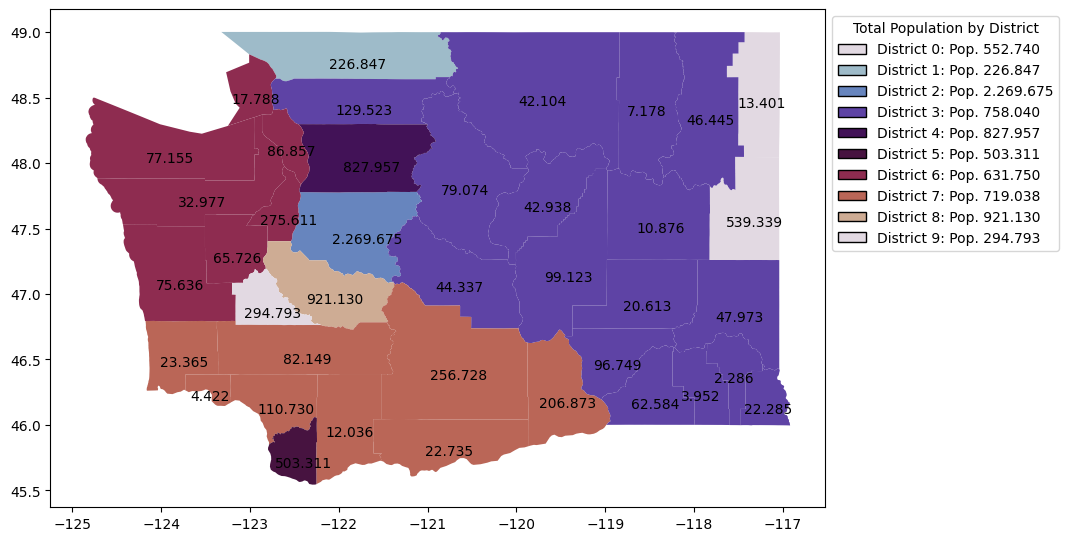

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Patch

# ... your code for loading the shapefile and setting up the GeoDataFrame ...

# Assuming 'data' and 'district_counties' are defined as mentioned earlier
# and 'district_population' is already calculated using that data

# Normalize the district values to match the color range
num_districts = len(counties_gdf['district'].unique())
cmap = plt.cm.get_cmap('twilight', num_districts)  # Replace 'viridis' with your colormap
norm = Normalize(vmin=0, vmax=num_districts - 1)  # Assuming district values start from 0

# Plot the GeoDataFrame with the colormap
fig, ax = plt.subplots(figsize=(10, 10))
# Do not display the automatic legend by setting legend=False
counties_gdf.plot(column='district', ax=ax, cmap=cmap, norm=norm, legend=False)

# Annotate each county with its population
for idx, row in counties_gdf.iterrows():
    centroid = row['geometry'].centroid
    # Format the population number with thousand separators as periods
    formatted_population = "{:,}".format(row['population']).replace(",", ".")
    plt.annotate(text=formatted_population, xy=(centroid.x, centroid.y), xytext=(-15, -10), textcoords="offset points")

# Create a scalar mappable object to assist with mapping district numbers to colors
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set the array to empty since we are using the ScalarMappable only for coloring

# Creating a custom legend for total population by district
# Make sure to sort the districts in the same order as they appear in the plot
sorted_districts = sorted(district_population.keys(), key=int)  # Sorting by district number, adjust as needed
legend_elements = [Patch(facecolor=sm.to_rgba(district), edgecolor='k',
                         label='District {}: Pop. {:,.0f}'.format(district, district_population[district]).replace(',', '.'))
                   for district in sorted_districts]

# Add the custom legend to the plot, outside the plot area
ax.legend(handles=legend_elements, title='Total Population by District', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
